<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b>Market Basket Analysis with Apriori Algorithm  </b></div>

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=#254E58>📝 Project Description:</font></h3>   
 
    
*Market basket analysis is a data mining technique used by retailers to increase sales by better understanding of customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.*

<h3 align="left"><font color=#254E58> Purpose: </font></h3>

This will answer the questions like:

- Which items are frequently bought together?
- If a user buys an item X, which item is he/she likely to buy next? 
    
    

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Importing Libraries </b></div>

In [1]:
# !pip install networkx==2.3
# !pip install mlxtend==0.14.0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

from warnings import filterwarnings
filterwarnings("ignore")

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Loading Dataset </b></div>

In [3]:
# import pandas as pd

df = pd.read_csv(r"C:\Users\DELL\Desktop\market_basket_analysis\Groceries_dataset.csv")  #"r" is used as a raw string literal so that the compiler dont reads backslash as escape char :)
print(df.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk



|STT | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Member_number | ID of customer |
| 2 | Date | Date of purchase |
| 3 | itemDescription | Description of product purchased |


In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Data Discovery </b></div>

In [5]:
df.Member_number.nunique()

3898

In [6]:
df.itemDescription.nunique()

167

In [7]:
df.Date.nunique()

728

In [8]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
df["itemDescription"].value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=#254E58>📝 Market Basket Analysis:</font></h3>     

Market Basket Analysis stands as a crucial technique employed by major retailers to unveil connections among products. This method involves searching for combinations of items that frequently appear together in customer transactions. In simpler terms, it empowers retailers to pinpoint correlations between the items purchased by customers.

Association Rules are widely used to analyze retail basket or transaction data and are intended to identify strong patterns discovered in transaction data.

In [10]:
# Using groupby function to create a basket df, which specifies if an item is bought by particular Member
# for all items and all Members
# this will denote the tranasaction happened in the particular day which needs to be fixed

basket = (df.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))

In [11]:
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [12]:
#We are getting the per day transactions (example : 2,4,3) while we just want to know if that particular item is purchased or not
#thus we are encoding units as 1(if purchased) or 0(not purchased)

def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=#254E58>📝 Association Rule Mining :</font></h3> 
    
Association rule mining is a process that deploys pattern recognition to identify and quantify relationship between different, yet related items.

A simple association rules use case -
    
Eggs and Bread are frequently purchased together. With this finding, you can increase sales by:
    
- Placing eggs and bread next to each other so that when a customer buys one of the products, they don't have to walk to buy the other product
- Advertising to buyer of either eggs or bread in order to increase that person's propensity to purchase the (paired) other product.
- Offer discounts on both eggs and bread if the customer buys both of them in one purchase.
    

    
**Association Rule:**
    "if item eggs are purchased,then the possibility of buying bread is ____"
    
Can also be represented as:
- {eggs} -> {bread}


<h3 align="left"><font color=#254E58>Advantages :</font></h3> 

- Relatively fast method
- Works well on small quantities of data
- Few(if any) feature engineering requirement
    
<h3 align="left"><font color=#254E58>Three Ways to Measure Association :</font></h3> 
    
1. Support
2. Confidence
3. Lift
    
<h3 align="left"><font color=#254E58>Illustration with an Example :</font></h3>  
Scenario : 5000 Total transaction in a supermarket  

- A = Bread Purchases = 500 Transactions
- C = Eggs Purchases = 350 Transactions
- (A->C) = Both Bread and Eggs Purchased = 150 Transactions
    
<h3 align="left"><font color=#254E58>Support :</font></h3>

- Support is a relative frequency of an item wthin a dataset.It basically expresses how popular the item is as represented by its proportion to the total items sold.
- Support for an item can be calculated as 
``` support(A->C) = Support (A ∪ C)```
    
 Example:   
  - Support(Bread) = (Number of Transactions Containing the Bread) / (Total Number of Transactions)
  - Support(Bread) =  500/5000 = 0.1

<h3 align="left"><font color=#254E58>Confidence :</font></h3> 

- Confidence is the probability of seeing the consequent item (a "then" term) within data, given that the data also contains the antecendent (the "if" term) item
- In other words, confidence tells you
   (**THEN**) How likely it is for 1 item to be purchased given that,
    (**IF**) another item is purchased.
- Confidence determines how many if-then statements are found to be true within a dataset    
    
``` Confidence(A -> C) = (Support(A -> C)) / (Support(A))```

    Where 
    A - antecedent 
    C - consequent
    
- Using the same example, the ;likelihood of buying eggs if bread are bought is :
- Confidence(Bread -> Eggs) = (150/5000) / (500/5000) = 0.3 = 30%
- So, there is 30% likelihood  that eggs will be bought if bread is purchased.

<h3 align="left"><font color=#254E58>Lift :</font></h3>

- Lift is a metric that measures how much more often the antecedent and consequent occur together rather than them occuring independently.
  
-  ``` Lift(A -> C) = (Confidence(A -> C)) / (Support(C))```
    
- Lift score >1: A is hightly associated with C. If A purchased, then it is highly likely that C will also be purchased.
- Lift score <1: If A purchased, then it is unlikely that C will be purchased.
- Lift score =1: Indicates that there is no association between items A and C.
- Lift(Bread -> Eggs) = 0.3 / (350/5000) = 4.28
- With a lift of 4.28, your rule would be "If a customer buys bread, then they're likely to also buy eggs".

The Apriori Algorithm is the algorithm that you use to implment association rule mining over structured data. 

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b>Implementation using mlxtend </b></div>

In [13]:
# trying out on a sample item
whole_milk_df = basket.loc[basket['whole milk']==1]

In [14]:
# Using apriori algorithm, creating association rules for the sample item

# Applying apriori algorithm for whole_milk_df
frequent_itemsets = apriori(whole_milk_df, min_support=0.15, use_colnames=True)

In [15]:
# Storing the association rules into rules
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [16]:
# Sorting the rules on lift and support
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
1,"(whole milk, yogurt)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
2,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
4,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
5,(other vegetables),"(whole milk, yogurt)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
6,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
7,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
8,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
9,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362


mlxtend Docs: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#association-rules-generation-from-frequent-itemsets

In [17]:
# Creating a new function in which we pass an item name and it returns the items which are frequently bought together
# In other words, it returns the items which are likely to be bought by user because he bought the item passed into function

def frequently_bought_together(item):
    
    # df of item passed
    item_df = basket.loc[basket[item]==1]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [18]:
# Example 1
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'salty snack'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [19]:
# Example 2
frequently_bought_together('ice cream')

Items frequently bought together with ice cream


array([frozenset({'ice cream'}), frozenset({'beef'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b>Validation </b></div> 

In [20]:
# Example 3
frequently_bought_together('chewing gum')

Items frequently bought together with chewing gum


array([frozenset({'chewing gum'}), frozenset({'beef'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'whole milk'}), frozenset({'butter'})], dtype=object)

In [21]:
# chewing gum is a part of invoice 2222, so we will print all items from ID 2222 and cross-check 
df[df['Member_number']==2222]

# There are a couple of common items between the recommendations from frequently_bought_together and the ID below
# Thus we can say the recommender is performing well

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

Both Whole Milk and Butter from the list of recommendations are among the actual list of bought items. 

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b>Visualization of Association Rules</b></div>

In [22]:
# For a sample, we will try out visualization techniques on Whole milk  df which we used earlier

support=whole_milk_rules.support.values
confidence=whole_milk_rules.confidence.values

In [23]:
import networkx as nx

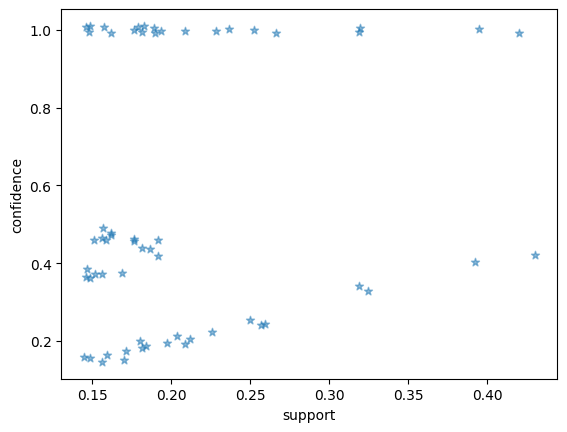

In [24]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence    
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [25]:
def visualize_rules(item, no_of_rules):

    
  # df of item passed
  item_df = basket.loc[basket[item]==1]
    
  # Applying apriori algorithm on item df
  frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
  # Storing association rules
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
  # Sorting on lift and support
  rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    
  print('Items frequently bought together with {0}'.format(item))
    
  # Returning top 6 items with highest lift and support
  print(rules['consequents'].unique()[:6])
    
  
  support = rules.support.values
  confidence = rules.confidence.values
  

  for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
    
  # Creating scatter plot of support v confidence  
  plt.scatter(support, confidence, alpha=0.5, marker="*")
  plt.title('Support vs Confidence graph')
  plt.xlabel('support')
  plt.ylabel('confidence') 
  plt.show()  
     
  # Creating a new digraph  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
  # adding as many nodes as number of rules requested by user 
  for i in range (no_of_rules):      
    G1.add_nodes_from(["R"+str(i)])
    
    # adding antecedents to the nodes 
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
    
    # adding consequents to the nodes
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
  print('Visualization of Rules')
  
 
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

In [26]:
def visualize_rules(item, no_of_rules, basket):
    # df of item passed
    item_df = basket.loc[basket[item] == 1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    print(rules['consequents'].head(6).tolist())

    support = rules.support.values
    confidence = rules.confidence.values

    for i in range(len(support)):
        support[i] = support[i] + 0.0025 * (random.randint(1, 10) - 5)
        confidence[i] = confidence[i] + 0.0025 * (random.randint(1, 10) - 5)

    # Creating scatter plot of support vs confidence
    plt.scatter(support, confidence, alpha=0.5, marker="*")
    plt.title('Support vs Confidence graph')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.show()

    # Creating a new digraph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    cmap = plt.get_cmap("viridis", no_of_rules)  # Choose a colormap
    colors = [cmap(i) for i in range(no_of_rules)]

    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    # adding as many nodes as the number of rules requested by the user
    for i in range(no_of_rules):
        G1.add_node("R"+str(i))

        # adding antecedents to the nodes
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), weight=2)

        # adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, weight=2)

    for node in G1.nodes():
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')

    print('Visualization of Rules')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)

    # Use a colormap for edge colors based on weight
    edge_colors = weights

    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, cmap=plt.cm.viridis,
            width=weights, font_size=16, with_labels=False, edge_cmap=plt.cm.Blues)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

Items frequently bought together with ice cream
[frozenset({'rolls/buns'}), frozenset({'rolls/buns'}), frozenset({'rolls/buns', 'ice cream'}), frozenset({'sausage'}), frozenset({'sausage'}), frozenset({'ice cream', 'sausage'})]


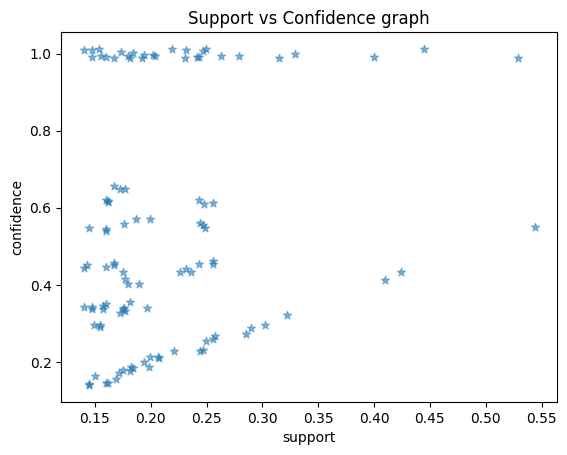

Visualization of Rules


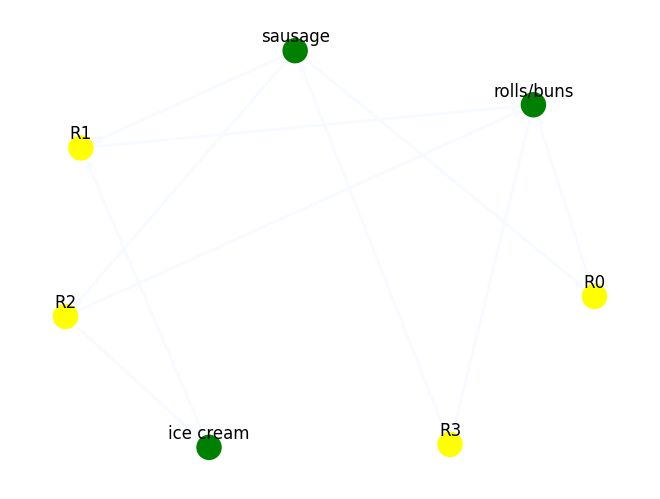

In [27]:
visualize_rules('ice cream',4,basket)

Items frequently bought together with butter
[frozenset({'other vegetables'}), frozenset({'other vegetables'}), frozenset({'other vegetables', 'butter'}), frozenset({'sausage'}), frozenset({'sausage'}), frozenset({'sausage', 'butter'})]


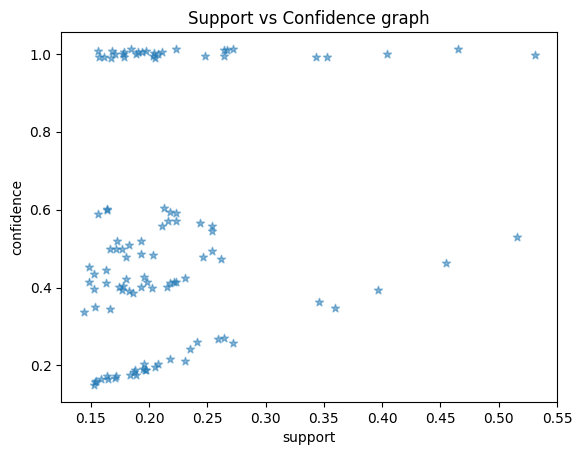

Visualization of Rules


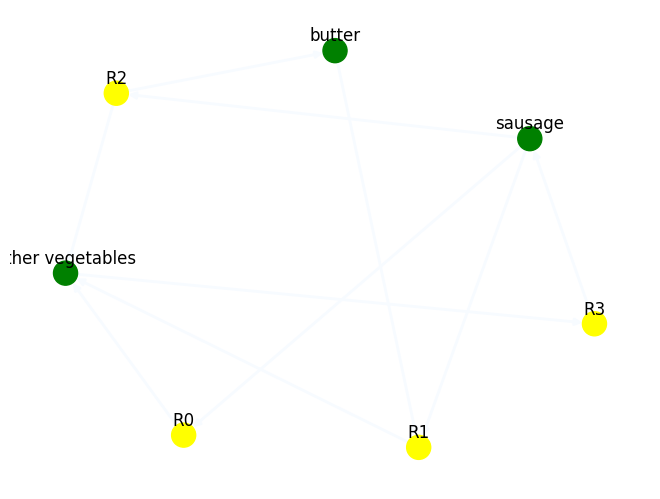

In [28]:
visualize_rules('butter',4,basket)

Items frequently bought together with chocolate
[frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'chocolate', 'whole milk'}), frozenset({'pip fruit'}), frozenset({'pip fruit'}), frozenset({'pip fruit', 'chocolate'})]


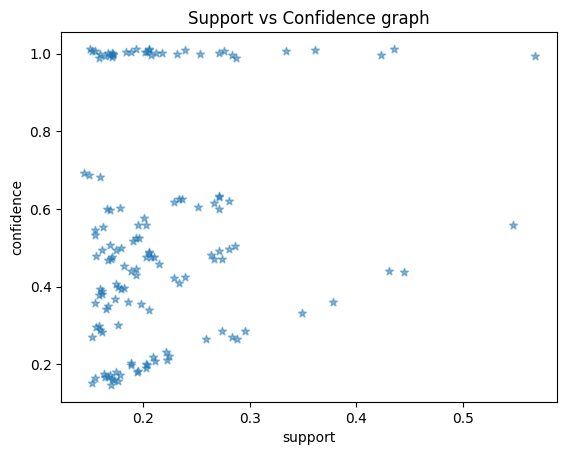

Visualization of Rules


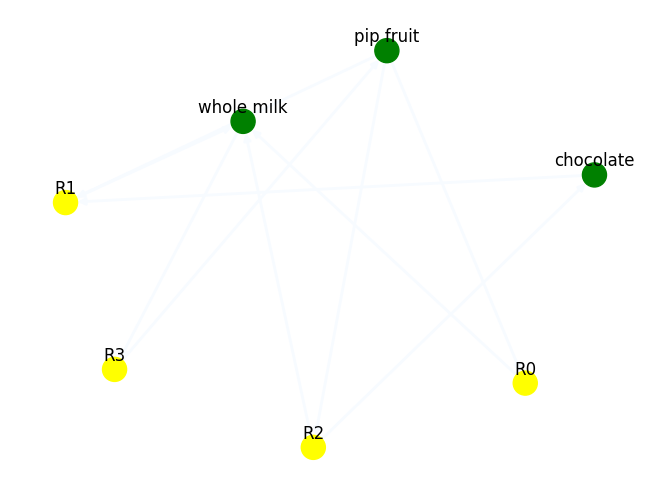

In [29]:
visualize_rules('chocolate',4,basket)

Items frequently bought together with salty snack
[frozenset({'whole milk'}), frozenset({'soda'}), frozenset({'whole milk'}), frozenset({'soda'}), frozenset({'salty snack', 'whole milk'}), frozenset({'salty snack', 'soda'})]


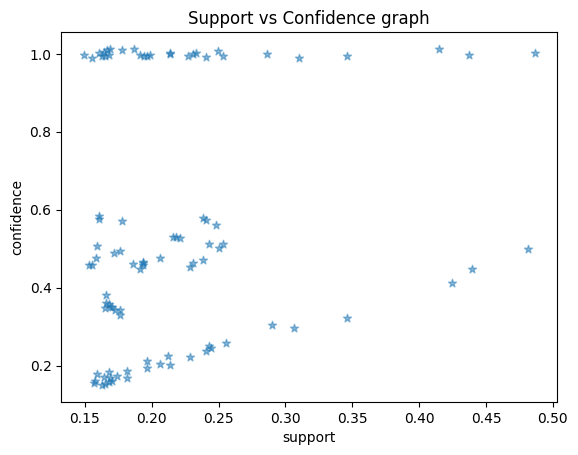

Visualization of Rules


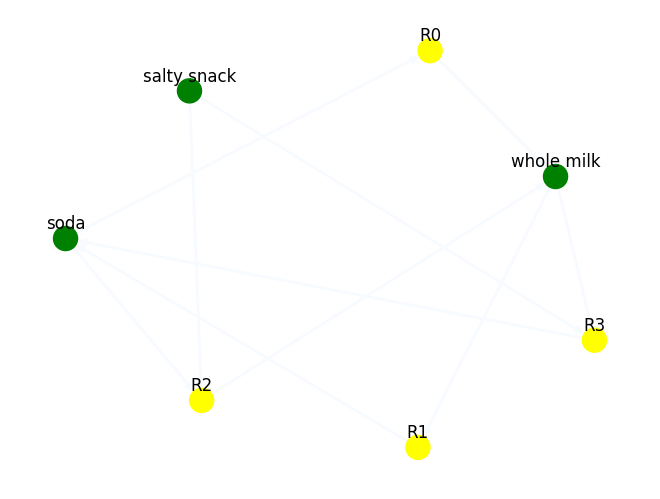

In [30]:
visualize_rules('salty snack',4,basket)

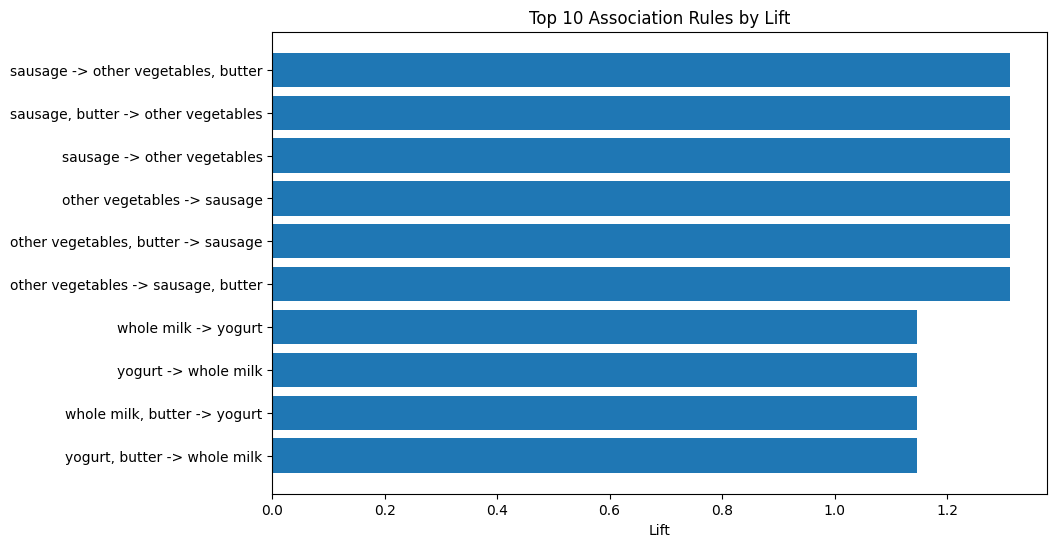

In [31]:
cat_df = basket.loc[basket['butter']==1]
frequent_itemsets = apriori(cat_df, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Convert frozensets to strings for labeling
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

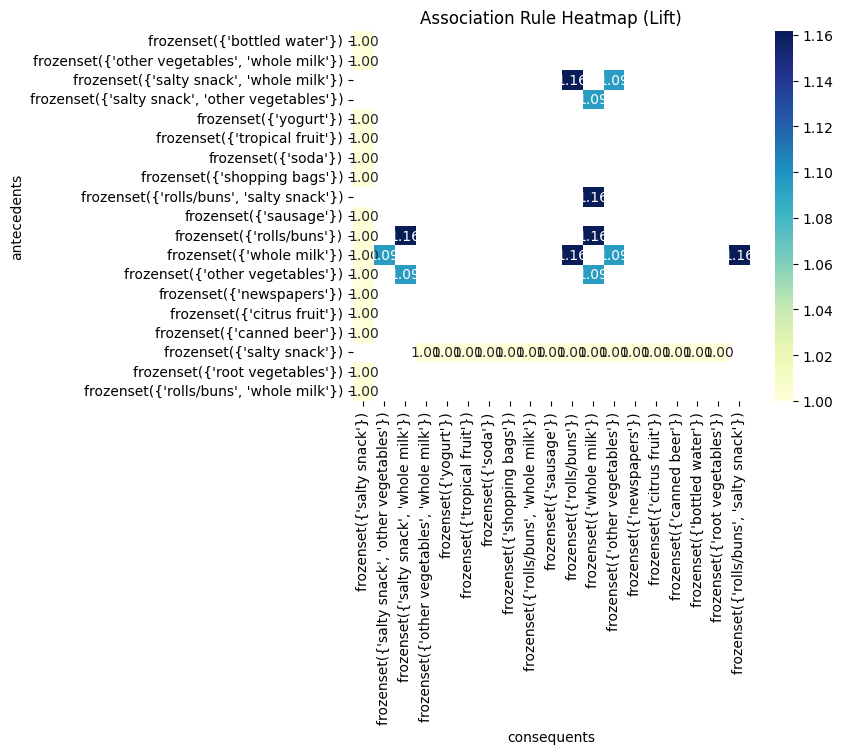

In [32]:
import seaborn as sns

cat_df = basket.loc[basket['salty snack']==1]
frequent_itemsets = apriori(cat_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Create a DataFrame for visualization
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Association Rule Heatmap (Lift)')
plt.show()

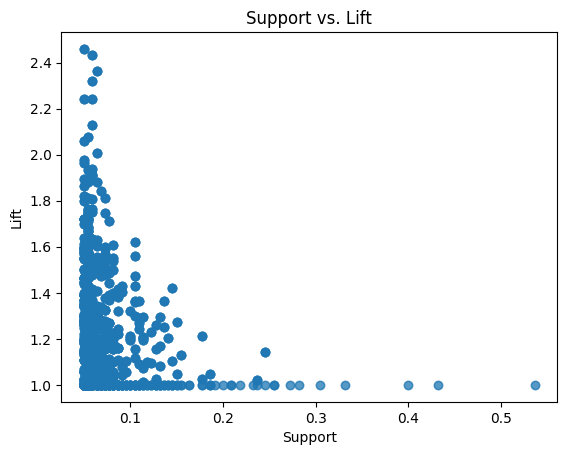

In [33]:
cat_df = basket.loc[basket['ice cream']==1]
frequent_itemsets = apriori(cat_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.show()

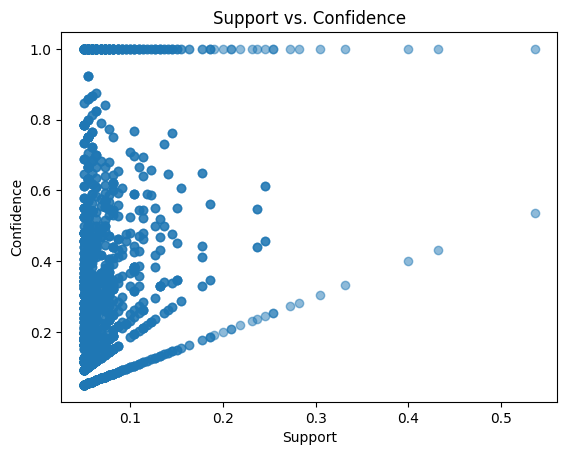

In [34]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()